# Análise de sentimentos do Twitter com dados extraidor do dataset anotado tweetSentBR

O trabalho será realizando apenas com os dados originail desbalanceados

### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados para treinamento do modelo

In [2]:
# carregando dataset
tweets_df = pd.read_csv('')

In [3]:
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,-1,test,tô passada com esse cara quanta merda pode sai...,False


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         15047 non-null  int64 
 1   hashtag    15047 non-null  object
 2   votes      15047 non-null  object
 3   hard       15047 non-null  int64 
 4   sentiment  15047 non-null  object
 5   group      15047 non-null  object
 6   text       15047 non-null  object
 7   repeat     15047 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 837.7+ KB


In [5]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
-,47,47,47,47,47,47,47
-1,4426,4426,4426,4426,4426,4426,4426
0,3926,3926,3926,3926,3926,3926,3926
1,6648,6648,6648,6648,6648,6648,6648


Como podemos observar, os dados estão desbalanceados e com algumas linhas apresentando a variável sentimento com o caracter traço '-'.

Para melhor trabalharmos com os dados, foi decidida a remoção dessas linhas.

In [6]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[ tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [7]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

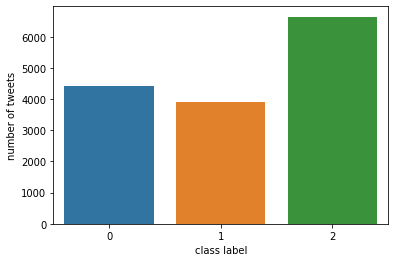

In [8]:
# Visualizando os dados graficamente
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

In [9]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426
1,3926,3926,3926,3926,3926,3926,3926
2,6648,6648,6648,6648,6648,6648,6648


# Efetuando a limpeza dos dados

In [10]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [11]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,length_tweet
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,67
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,19
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,48
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,65


# Lematização

In [15]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-13 15:59:13.214413: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 14.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [17]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [18]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,length_tweet,text_lemma
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,19,irmã galvão ador
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [19]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import simplemma
from simplemma import text_lemmatizer

In [21]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [22]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,length_tweet,text_lemma,text_lemma_2
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,19,irmã galvão ador,irmão galvão adorar
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


# Machine Learning - Utils

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import TfidfVectorizer

# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [24]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [25]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha=0.0001,
                                     loss='modified_huber', 
                                     penalty ='l2'))
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 2):
        modelo_nb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB(alpha=0.1))
        ])
        return modelo_nb_tfidf
    
    elif(pipe == 3):
        modelo_rf_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators=10))
        ])
        return modelo_rf_tfidf
    
    elif(pipe == 4):
        modelo_knn_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=1, 
                                            weights='uniform'))
        ])
        return modelo_knn_tfidf
    
    elif(pipe == 5):
        modelo_pa_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.03, 
                                                   loss= 'squared_hinge'))
        ])
        return modelo_pa_tfidf
    
    elif(pipe == 6):
        modelo_gb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', GradientBoostingClassifier(criterion='friedman_mse', 
                                                  learning_rate=0.2, 
                                                  max_depth=8, 
                                                  max_features='sqrt', 
                                                  n_estimators=10))
        ])
        return modelo_gb_tfidf
    
    elif(pipe == 7):
        modelo_xgb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', xgb.XGBClassifier(learning_rate=0.5, 
                                         max_depth=4, 
                                         objective='binary=hinge'))
        ])
        return modelo_xgb_tfidf
    
    elif(pipe == 8):
        modelo_mlp_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MLPClassifier(activation='relu', 
                                     alpha=0.05, 
                                     hidden_layer_sizes=(50, 100, 50), 
                                     learning_rate='constant', 
                                     solver='adam'))
        ])
        return modelo_mlp_tfidf
    
    elif(pipe == 9):
        modelo_lr_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 100.0, 
                                          penalty= 'l2'))
        ])
        return modelo_lr_tfidf
    
    elif(pipe == 10):
        modelo_svc_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C=10, 
                           gamma=1, 
                           kernel='rbf'))
        ])
        return modelo_svc_tfidf

In [26]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados originais

In [28]:
X = tweets_df['text_lemma_2']
y = tweets_df['sentiment']

In [29]:
X.shape, y.shape

((15000,), (15000,))

### Separando dados para o treino e para o teste

In [30]:
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_text.shape, y_test.shape

((11250,), (11250,), (3750,), (3750,))

## Modelo 1 (TfidfVectorizer e SGDClassifier)

In [31]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train, y_train)
modelo1_pred_orig = modelo1_orig.predict(X_text)

In [32]:
modelo1_pred_orig

array([2, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62      1145
           1       0.46      0.40      0.43       967
           2       0.69      0.75      0.72      1638

    accuracy                           0.62      3750
   macro avg       0.59      0.59      0.59      3750
weighted avg       0.61      0.62      0.61      3750

Acurácia: 0.6187

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         712  231   202  1145
1         246  384   337   967
2         196  218  1224  1638
All      1154  833  1763  3750 


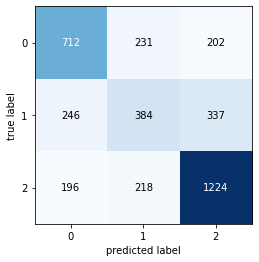

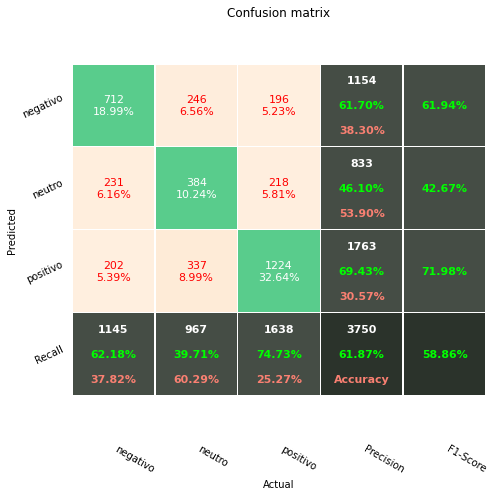

In [33]:
matriz_confusao(y_test, modelo1_pred_orig)

### Validação cruzada - modelo 1

In [34]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63      4426
           1       0.49      0.42      0.45      3926
           2       0.70      0.75      0.72      6648

    accuracy                           0.63     15000
   macro avg       0.60      0.60      0.60     15000
weighted avg       0.62      0.63      0.63     15000

Acurácia: 0.6303

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2811   788   827   4426
1         962  1647  1317   3926
2         733   918  4997   6648
All      4506  3353  7141  15000 


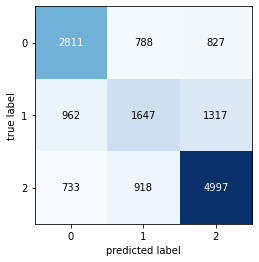

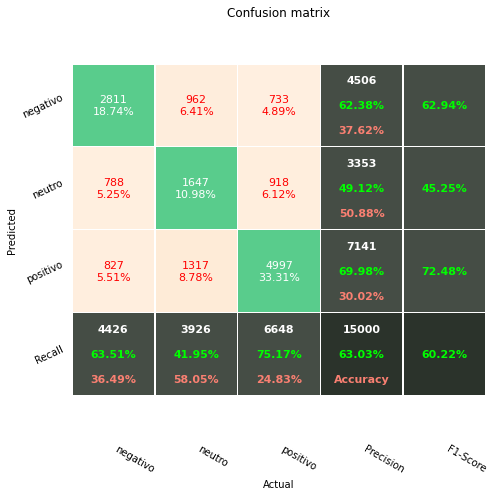

In [35]:
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e MultinomialNB)

In [36]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_orig.fit(X_train, y_train)
modelo2_pred_orig = modelo2_orig.predict(X_text)

In [37]:
modelo2_pred_orig

array([0, 0, 2, ..., 2, 1, 2])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.61      0.61      1145
           1       0.47      0.29      0.36       967
           2       0.65      0.79      0.71      1638

    accuracy                           0.61      3750
   macro avg       0.57      0.56      0.56      3750
weighted avg       0.59      0.61      0.59      3750

Acurácia: 0.6053

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         703  160   282  1145
1         266  278   423   967
2         195  154  1289  1638
All      1164  592  1994  3750 


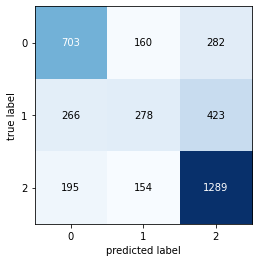

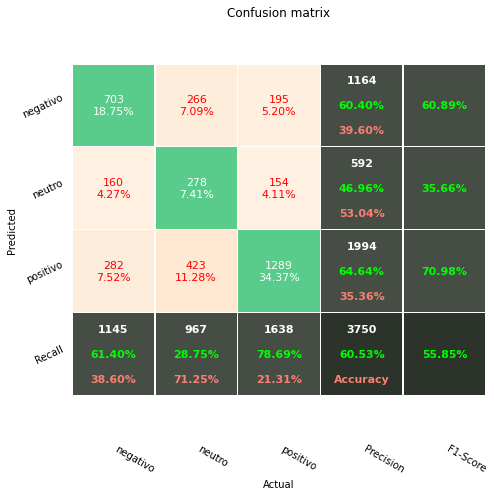

In [38]:
matriz_confusao(y_test, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [39]:
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      4426
           1       0.52      0.31      0.39      3926
           2       0.66      0.79      0.72      6648

    accuracy                           0.62     15000
   macro avg       0.59      0.58      0.58     15000
weighted avg       0.61      0.62      0.60     15000

Acurácia: 0.6194

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2788   553  1085   4426
1        1032  1220  1674   3926
2         779   586  5283   6648
All      4599  2359  8042  15000 


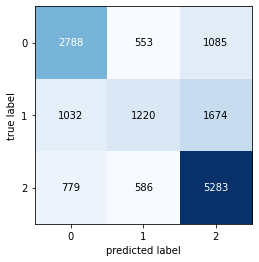

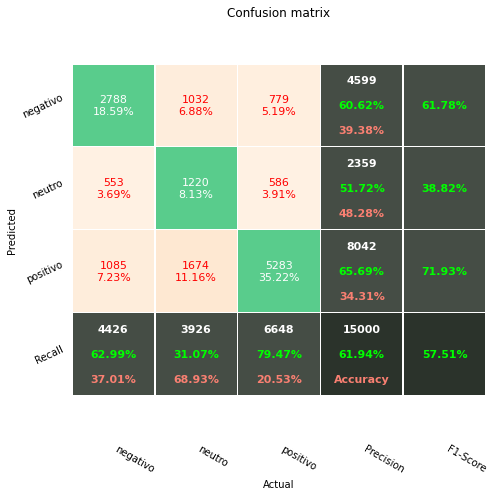

In [40]:
matriz_confusao(y, validacao_cruzada2)

## Modelo 3 (TfidfVectorizer e RandomForestClassifier)

In [41]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_orig.fit(X_train, y_train)
modelo3_pred_orig = modelo3_orig.predict(X_text)

In [42]:
modelo3_pred_orig

array([0, 0, 2, ..., 2, 1, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      1145
           1       0.44      0.41      0.43       967
           2       0.65      0.68      0.67      1638

    accuracy                           0.58      3750
   macro avg       0.56      0.56      0.56      3750
weighted avg       0.58      0.58      0.58      3750

Acurácia: 0.5789

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         653  218   274  1145
1         243  400   324   967
2         232  288  1118  1638
All      1128  906  1716  3750 


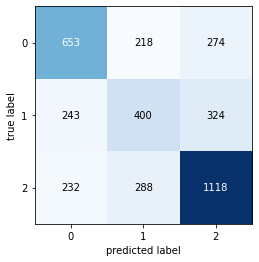

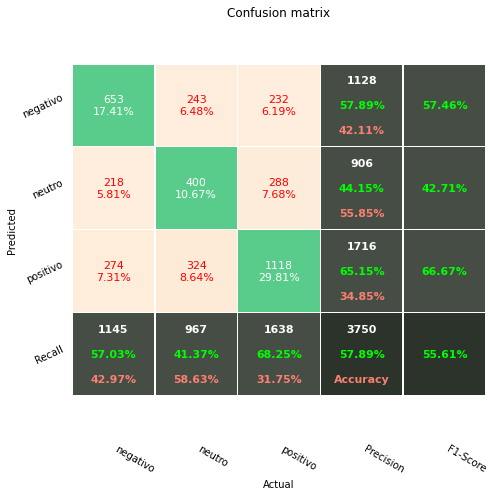

In [43]:
matriz_confusao(y_test, modelo3_pred_orig)

### Validação cruzada - modelo 3

In [44]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.58      0.57      4426
           1       0.45      0.41      0.43      3926
           2       0.67      0.69      0.68      6648

    accuracy                           0.59     15000
   macro avg       0.56      0.56      0.56     15000
weighted avg       0.58      0.59      0.59     15000

Acurácia: 0.5879

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2580   851   995   4426
1        1052  1626  1248   3926
2         926  1110  4612   6648
All      4558  3587  6855  15000 


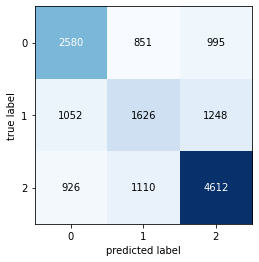

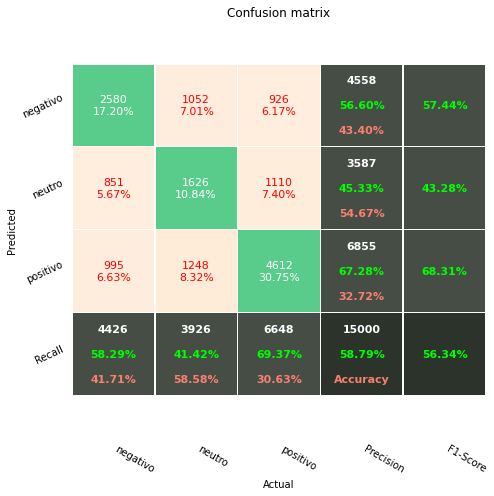

In [45]:
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e KNeighborsClassifier)

In [46]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_orig.fit(X_train, y_train)
modelo4_pred_orig = modelo4_orig.predict(X_text)

In [47]:
modelo4_pred_orig

array([2, 1, 2, ..., 2, 1, 2])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.22      0.32      1145
           1       0.44      0.24      0.31       967
           2       0.49      0.84      0.62      1638

    accuracy                           0.49      3750
   macro avg       0.52      0.43      0.42      3750
weighted avg       0.52      0.49      0.45      3750

Acurácia: 0.4947

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        249  113   783  1145
1         71  235   661   967
2         78  189  1371  1638
All      398  537  2815  3750 


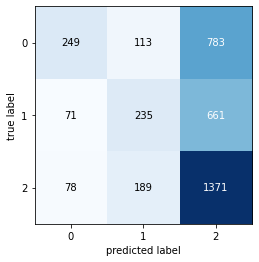

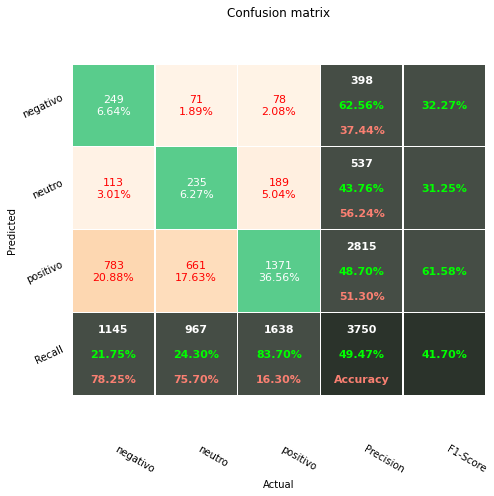

In [48]:
matriz_confusao(y_test, modelo4_pred_orig)

### Validação cruzada - modelo 4

In [49]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.22      0.32      4426
           1       0.30      0.71      0.42      3926
           2       0.67      0.40      0.50      6648

    accuracy                           0.43     15000
   macro avg       0.52      0.44      0.41     15000
weighted avg       0.55      0.43      0.42     15000

Acurácia: 0.4258

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0         957  3007   462   4426
1         310  2800   816   3926
2         351  3667  2630   6648
All      1618  9474  3908  15000 


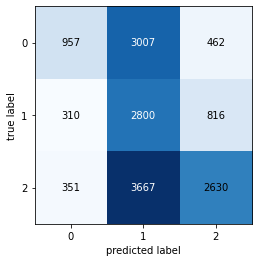

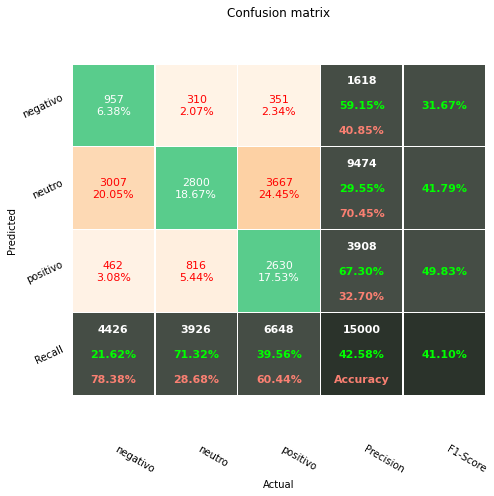

In [50]:
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (TfidfVectorizer e PassiveAggressiveClassifier)

In [51]:
modelo5_orig = escolher_pipeline(5)
modelo5_orig = modelo5_orig.fit(X_train, y_train)
modelo5_pred_orig = modelo5_orig.predict(X_text)

In [52]:
modelo5_pred_orig

array([2, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.58      0.59      1145
           1       0.43      0.42      0.43       967
           2       0.68      0.72      0.70      1638

    accuracy                           0.60      3750
   macro avg       0.57      0.57      0.57      3750
weighted avg       0.60      0.60      0.60      3750

Acurácia: 0.5976

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         660  272   213  1145
1         229  409   329   967
2         199  267  1172  1638
All      1088  948  1714  3750 


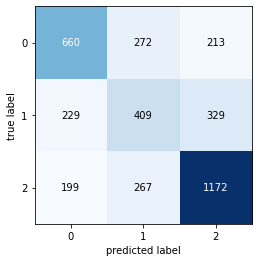

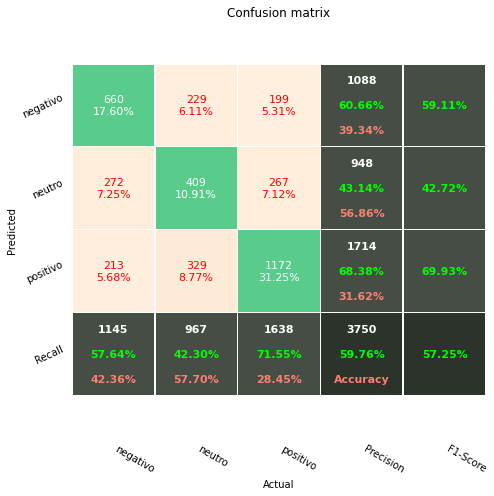

In [53]:
matriz_confusao(y_test, modelo5_pred_orig)

### Validação cruzada - modelo 5

In [54]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.60      0.60      4426
           1       0.46      0.44      0.45      3926
           2       0.69      0.71      0.70      6648

    accuracy                           0.61     15000
   macro avg       0.59      0.59      0.59     15000
weighted avg       0.61      0.61      0.61     15000

Acurácia: 0.6088

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2658   916   852   4426
1         927  1736  1263   3926
2         791  1119  4738   6648
All      4376  3771  6853  15000 


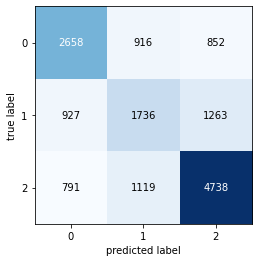

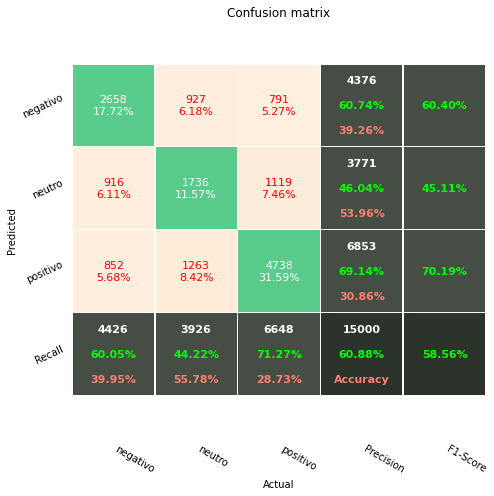

In [55]:
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (TfidfVectorizer e GradientBoostingClassifier)

In [56]:
modelo6_orig = escolher_pipeline(6)
modelo6_orig = modelo6_orig.fit(X_train, y_train)
modelo6_pred_orig = modelo6_orig.predict(X_text)

In [57]:
modelo6_pred_orig

array([2, 2, 2, ..., 2, 1, 2])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.19      0.30      1145
           1       0.79      0.05      0.10       967
           2       0.47      0.97      0.64      1638

    accuracy                           0.50      3750
   macro avg       0.66      0.40      0.34      3750
weighted avg       0.63      0.50      0.39      3750

Acurácia: 0.4960

Matrix de confusão:
 Predito    0   1     2   All
Real                        
0        216   6   923  1145
1         51  49   867   967
2         36   7  1595  1638
All      303  62  3385  3750 


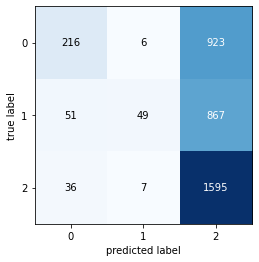

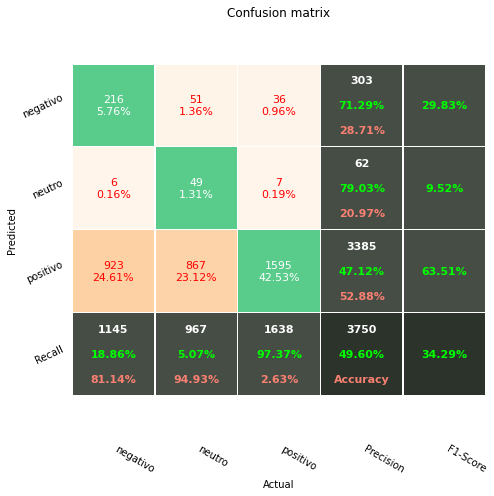

In [58]:
matriz_confusao(y_test, modelo6_pred_orig)

### Validação cruzada - modelo 6

In [59]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.19      0.30      4426
           1       0.78      0.06      0.11      3926
           2       0.48      0.98      0.64      6648

    accuracy                           0.50     15000
   macro avg       0.66      0.41      0.35     15000
weighted avg       0.63      0.50      0.40     15000

Acurácia: 0.5038

Matrix de confusão:
 Predito     0    1      2    All
Real                            
0         833   28   3565   4426
1         182  238   3506   3926
2         124   38   6486   6648
All      1139  304  13557  15000 


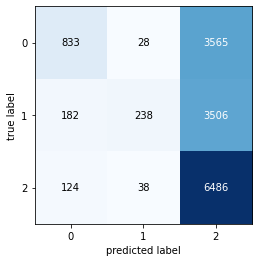

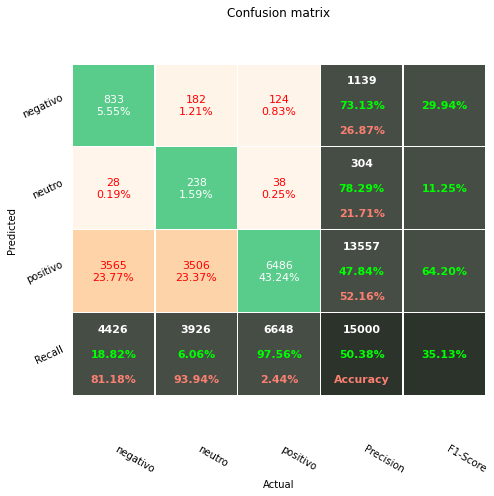

In [60]:
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (TfidfVectorizer e XGBClassifier)

In [61]:
modelo7_orig = escolher_pipeline(7)
modelo7_orig = modelo7_orig.fit(X_train, y_train)
modelo7_pred_orig = modelo7_orig.predict(X_text)

In [62]:
modelo7_pred_orig

array([2, 1, 2, ..., 2, 1, 2])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59      1145
           1       0.48      0.35      0.40       967
           2       0.62      0.81      0.70      1638

    accuracy                           0.60      3750
   macro avg       0.59      0.56      0.56      3750
weighted avg       0.59      0.60      0.59      3750

Acurácia: 0.6016

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        603  194   348  1145
1        161  334   472   967
2        148  171  1319  1638
All      912  699  2139  3750 


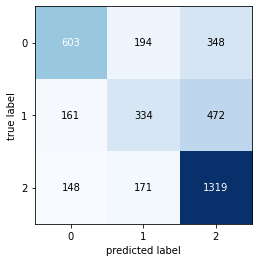

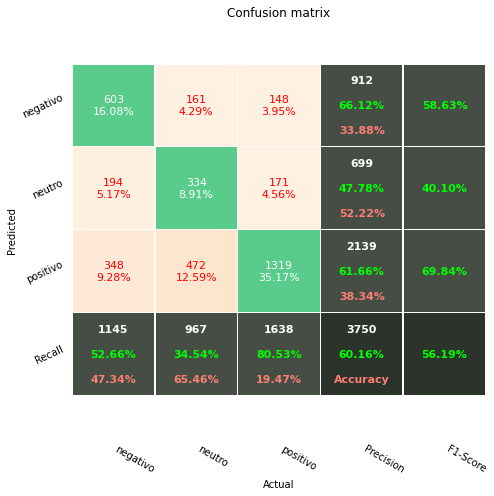

In [63]:
matriz_confusao(y_test, modelo7_pred_orig)

### Validação cruzada - modelo 7

In [64]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.53      0.58      4426
           1       0.49      0.34      0.40      3926
           2       0.63      0.81      0.71      6648

    accuracy                           0.61     15000
   macro avg       0.59      0.56      0.56     15000
weighted avg       0.60      0.61      0.59     15000

Acurácia: 0.6060

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2349   686  1391   4426
1         747  1342  1837   3926
2         560   689  5399   6648
All      3656  2717  8627  15000 


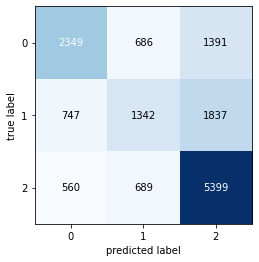

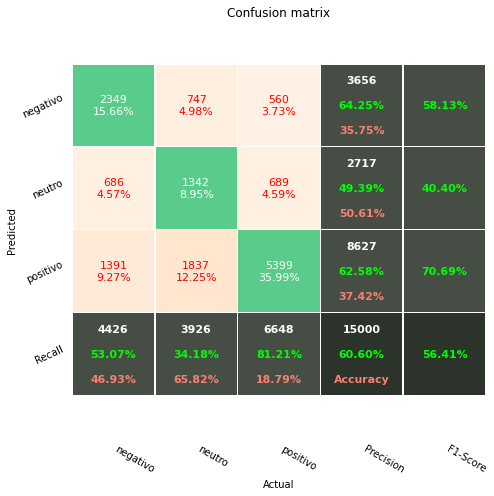

In [65]:
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (TfidfVectorizer e MLPClassifier)

In [66]:
modelo8_orig = escolher_pipeline(8)
modelo8_orig = modelo8_orig.fit(X_train, y_train)
modelo8_pred_orig = modelo8_orig.predict(X_text)

In [67]:
modelo8_pred_orig

array([2, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60      1145
           1       0.43      0.45      0.44       967
           2       0.70      0.67      0.69      1638

    accuracy                           0.60      3750
   macro avg       0.58      0.58      0.58      3750
weighted avg       0.60      0.60      0.60      3750

Acurácia: 0.5955

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         698   279   168  1145
1         241   432   294   967
2         240   295  1103  1638
All      1179  1006  1565  3750 


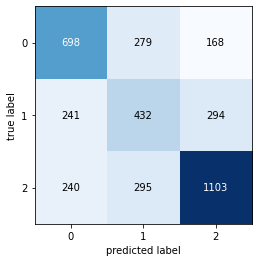

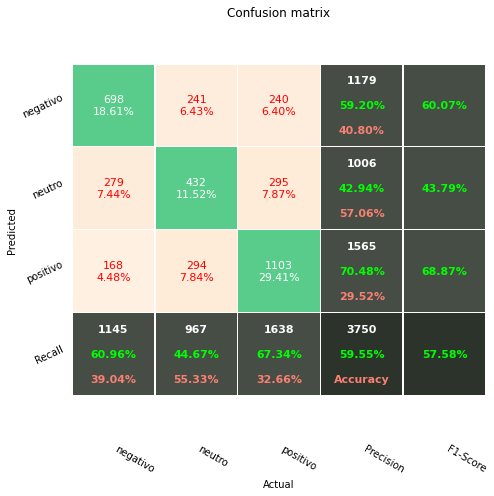

In [68]:
matriz_confusao(y_test, modelo8_pred_orig)

### Validação cruzada - modelo 8

In [69]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59      4426
           1       0.44      0.45      0.45      3926
           2       0.69      0.69      0.69      6648

    accuracy                           0.60     15000
   macro avg       0.58      0.57      0.58     15000
weighted avg       0.60      0.60      0.60     15000

Acurácia: 0.5958

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2566  1001   859   4426
1         912  1778  1236   3926
2         801  1254  4593   6648
All      4279  4033  6688  15000 


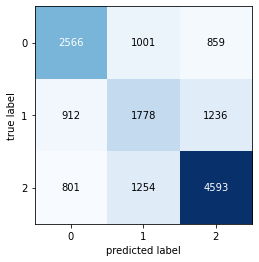

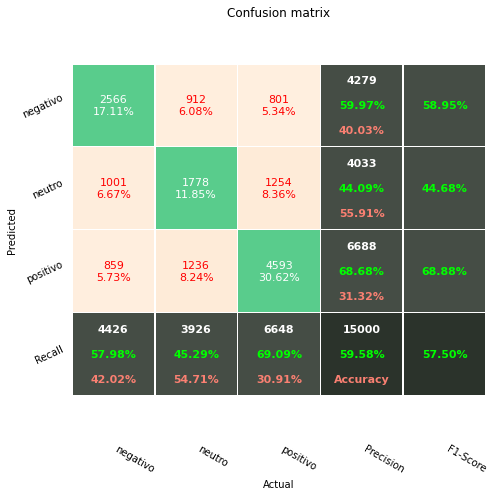

In [70]:
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (TfidfVectorizer e LogisticRegression)

In [71]:
modelo9_orig = escolher_pipeline(9)
modelo9_orig = modelo9_orig.fit(X_train, y_train)
modelo9_pred_orig = modelo9_orig.predict(X_text)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [72]:
modelo9_pred_orig

array([2, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59      1145
           1       0.42      0.44      0.43       967
           2       0.68      0.69      0.69      1638

    accuracy                           0.59      3750
   macro avg       0.57      0.57      0.57      3750
weighted avg       0.59      0.59      0.59      3750

Acurácia: 0.5904

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         656  280   209  1145
1         221  424   322   967
2         210  294  1134  1638
All      1087  998  1665  3750 


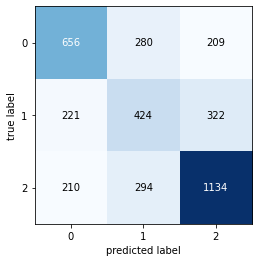

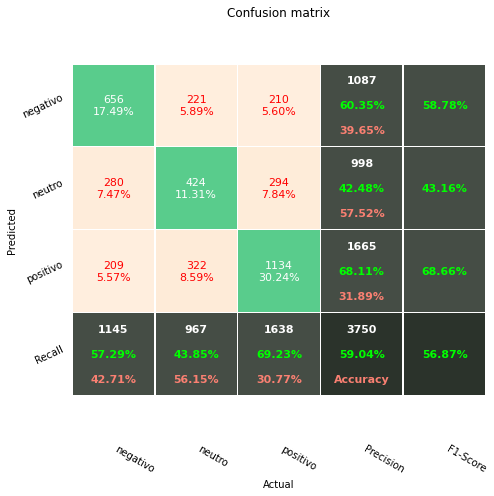

In [73]:
matriz_confusao(y_test, modelo9_pred_orig)

### Validação cruzada - modelo 9

In [74]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.60      0.60      4426
           1       0.46      0.45      0.46      3926
           2       0.69      0.71      0.70      6648

    accuracy                           0.61     15000
   macro avg       0.59      0.59      0.59     15000
weighted avg       0.61      0.61      0.61     15000

Acurácia: 0.6102

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2644   944   838   4426
1         908  1778  1240   3926
2         769  1148  4731   6648
All      4321  3870  6809  15000 


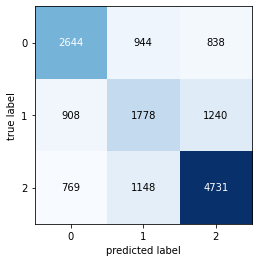

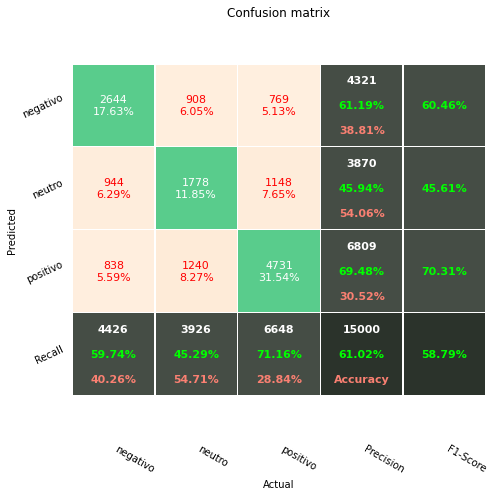

In [75]:
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (TfidfVectorizer e SVC)

In [76]:
modelo10_orig = escolher_pipeline(10)
modelo10_orig = modelo10_orig.fit(X_train, y_train)
modelo10_pred_orig = modelo10_orig.predict(X_text)

In [77]:
modelo10_pred_orig

array([0, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62      1145
           1       0.46      0.42      0.44       967
           2       0.70      0.75      0.72      1638

    accuracy                           0.62      3750
   macro avg       0.60      0.59      0.59      3750
weighted avg       0.62      0.62      0.62      3750

Acurácia: 0.6229

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         704  240   201  1145
1         239  403   325   967
2         176  233  1229  1638
All      1119  876  1755  3750 


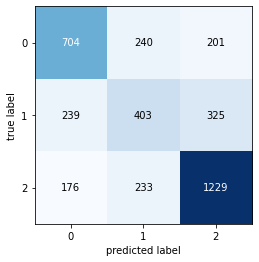

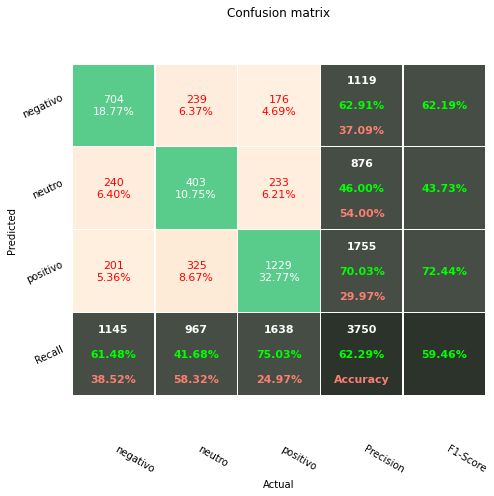

In [78]:
matriz_confusao(y_test, modelo10_pred_orig)

### Validação cruzada - modelo 10

In [79]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      4426
           1       0.49      0.43      0.46      3926
           2       0.70      0.75      0.73      6648

    accuracy                           0.63     15000
   macro avg       0.61      0.60      0.60     15000
weighted avg       0.62      0.63      0.63     15000

Acurácia: 0.6319

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2781   820   825   4426
1         946  1678  1302   3926
2         694   935  5019   6648
All      4421  3433  7146  15000 


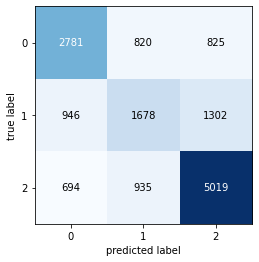

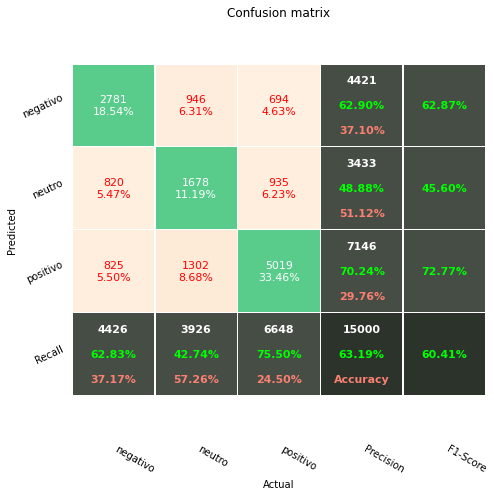

In [80]:
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [81]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test, modelo1_pred_orig, output_dict=True)
report2 = metrics.classification_report(y_test, modelo2_pred_orig, output_dict=True)
report3 = metrics.classification_report(y_test, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test, modelo10_pred_orig, output_dict=True)

In [90]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'f1_media', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [91]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy


In [92]:
# criando a lista com o modelos de classificação
modelos = ['SGD_Tfidf',
            'MultinomialNB_Tfidf',
            'RandomForest_Tfidf',
            'KNeighbors_Tfidf',
            'PassiveAggressive_Tfidf',
            'GradientBoosting_Tfidf',
            'XGB_Tfidf',
            'MLP_Tfidf',
            'LogisticRegression_Tfidf',
            'SVC_Tfidf']

In [93]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report2,
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [94]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['macro avg']['f1-score'],2),
                    round(reports[i]['accuracy'], 2)] 

In [95]:
report_df.sort_values(by='f1_media', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy
0,SGD_Tfidf,0.62,0.46,0.69,0.62,0.40,0.75,0.62,0.43,0.72,0.59,0.62
9,SVC_Tfidf,0.63,0.46,0.70,0.61,0.42,0.75,0.62,0.44,0.72,0.59,0.62
7,MLP_Tfidf,0.59,0.43,0.70,0.61,0.45,0.67,0.60,0.44,0.69,0.58,0.60
4,PassiveAggressive_Tfidf,0.61,0.43,0.68,0.58,0.42,0.72,0.59,0.43,0.70,0.57,0.60
8,LogisticRegression_Tfidf,0.60,0.42,0.68,0.57,0.44,0.69,0.59,0.43,0.69,0.57,0.59
1,MultinomialNB_Tfidf,0.60,0.47,0.65,0.61,0.29,0.79,0.61,0.36,0.71,0.56,0.61
2,RandomForest_Tfidf,0.58,0.44,0.65,0.57,0.41,0.68,0.57,0.43,0.67,0.56,0.58
6,XGB_Tfidf,0.66,0.48,0.62,0.53,0.35,0.81,0.59,0.40,0.70,0.56,0.60
3,KNeighbors_Tfidf,0.63,0.44,0.49,0.22,0.24,0.84,0.32,0.31,0.62,0.42,0.49
5,GradientBoosting_Tfidf,0.71,0.79,0.47,0.19,0.05,0.97,0.30,0.10,0.64,0.34,0.50


In [96]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
# salvando o relatório consolidado em excel
report_df.to_excel("repost_original_tfidf.xlsx")